# Chapter 8

## ch8.1
### 비지도 학습 Autoencoder

`지도학습` : 원하는 결과를 알려주고 학습하게 하는 방법

`비지도학습` : 입력값으로 부터 데이터의 특징을 찾아내는 학습방법

`오토인코더` : 입력값과 출력값을 같게하는 신경망
 
 - 가운데 계층의 노드 수가 입력값보다 적은 것이 특징
 - 입력데이터 압축
 - 노이즈 제거 효과적
 - 입력층의 데이터를 `인코더`를 통해 은닉층으로 내보내고, 은닉층의 데이터를 `디코더`를 통해 출력층으로 내보내고, 만들어진 출력값을 입력값과 비슷해지도록 가중치를 찾아내는 것

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


#### 하이퍼파라미터로 사용할 옵션들을 따로 빼내어 코드를 구조화

In [2]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256 #은닉층 뉴런개수
n_input = 28*28 # 입력값의 크기

#### 신경망 모델 구성

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])

#### 인코더
- 은닉층이 더 작아서 입력값을 압축하고 노이즈를 제거하면서 입력값의 특징을 찾아내게 됨.

In [4]:
W_encode = tf.Variable(tf.random_normal([n_input,n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))

#### 디코더

In [5]:
W_decode = tf.Variable(tf.random_normal([n_hidden,n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

#### 입력층(784) -> 은닉층(256) -> 출력층(784)
#### 손실함수

- 입력 X를 평가하기 위한 실측값으로 사용하고, 디코더가 내보낸 결괏값과의 차이를 손실값으로 설정, 그리고 그 값의 차이를 거리 함수로 구함

In [6]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

#### 최적화 함수

In [7]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### 학습 시작

In [21]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch +1),'Avg. cost =','{:.4f}'.format(total_cost / total_batch))

print('최적화 완료')
print('==하이퍼파라미터 정보==')
print('learning_rate')
print(learning_rate)
print('training_epoch')
print(training_epoch)
print('batch_size')
print(batch_size)
print('n_hidden')
print(n_hidden)
print('n_input')
print(n_input)

Epoch: 0001 Avg. cost = 0.2096
Epoch: 0002 Avg. cost = 0.0713
Epoch: 0003 Avg. cost = 0.0625
Epoch: 0004 Avg. cost = 0.0568
Epoch: 0005 Avg. cost = 0.0502
Epoch: 0006 Avg. cost = 0.0473
Epoch: 0007 Avg. cost = 0.0452
Epoch: 0008 Avg. cost = 0.0419
Epoch: 0009 Avg. cost = 0.0408
Epoch: 0010 Avg. cost = 0.0403
Epoch: 0011 Avg. cost = 0.0399
Epoch: 0012 Avg. cost = 0.0396
Epoch: 0013 Avg. cost = 0.0394
Epoch: 0014 Avg. cost = 0.0392
Epoch: 0015 Avg. cost = 0.0388
Epoch: 0016 Avg. cost = 0.0370
Epoch: 0017 Avg. cost = 0.0365
Epoch: 0018 Avg. cost = 0.0360
Epoch: 0019 Avg. cost = 0.0358
Epoch: 0020 Avg. cost = 0.0357
최적화 완료
==하이퍼파라미터 정보==
learning_rate
0.01
training_epoch
20
batch_size
100
n_hidden
256
n_input
784


#### matplotlib을 이용해 이미지로 출력하여 결과 확인

In [14]:
sample_size = 10

samples = sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]})

#### numpy 로 MNIST 데이터를 28*28 크기의 이미지 데이터로 재구성 후 그래프에 이미지로 출력

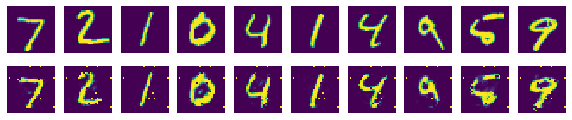

In [15]:
fig, ax = plt.subplots(2, sample_size, figsize = (sample_size,2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    ax[1][i].imshow(np.reshape(samples[i],(28,28)))
    
plt.show()

### Epoch 에따른 이미지 잡음 비교

Epoch: 0001 Avg. cost = 0.1993
Epoch: 0002 Avg. cost = 0.0578
Epoch: 0003 Avg. cost = 0.0495
Epoch: 0004 Avg. cost = 0.0460
Epoch: 0005 Avg. cost = 0.0408
Epoch: 0006 Avg. cost = 0.0377
Epoch: 0007 Avg. cost = 0.0355
Epoch: 0008 Avg. cost = 0.0334
Epoch: 0009 Avg. cost = 0.0322
Epoch: 0010 Avg. cost = 0.0318
Epoch: 0011 Avg. cost = 0.0315
Epoch: 0012 Avg. cost = 0.0313
Epoch: 0013 Avg. cost = 0.0310
Epoch: 0014 Avg. cost = 0.0307
Epoch: 0015 Avg. cost = 0.0305
Epoch: 0016 Avg. cost = 0.0303
Epoch: 0017 Avg. cost = 0.0301
Epoch: 0018 Avg. cost = 0.0298
Epoch: 0019 Avg. cost = 0.0278
Epoch: 0020 Avg. cost = 0.0268
Epoch: 0021 Avg. cost = 0.0266
Epoch: 0022 Avg. cost = 0.0265
Epoch: 0023 Avg. cost = 0.0263
Epoch: 0024 Avg. cost = 0.0261
Epoch: 0025 Avg. cost = 0.0256
Epoch: 0026 Avg. cost = 0.0250
Epoch: 0027 Avg. cost = 0.0243
Epoch: 0028 Avg. cost = 0.0241
Epoch: 0029 Avg. cost = 0.0240
Epoch: 0030 Avg. cost = 0.0239
Epoch: 0031 Avg. cost = 0.0239
Epoch: 0032 Avg. cost = 0.0238
Epoch: 0

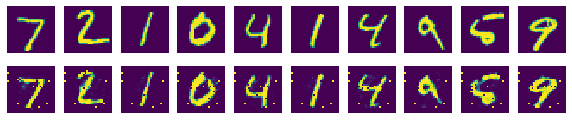

In [23]:
training_epoch = 50

X = tf.placeholder(tf.float32, [None, n_input])

W_encode = tf.Variable(tf.random_normal([n_input,n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))

W_decode = tf.Variable(tf.random_normal([n_hidden,n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch +1),'Avg. cost =','{:.4f}'.format(total_cost / total_batch))

print('최적화 완료')
print('==하이퍼파라미터 정보==')
print('learning_rate')
print(learning_rate)
print('training_epoch')
print(training_epoch)
print('batch_size')
print(batch_size)
print('n_hidden')
print(n_hidden)
print('n_input')
print(n_input)

sample_size = 10
samples = sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize = (sample_size,2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    ax[1][i].imshow(np.reshape(samples[i],(28,28)))
    
plt.show()